In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
ruta_xls = 'C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T124.xlsx'
df = pd.read_excel(ruta_xls, engine="openpyxl")
df_sorted =df[df['REGION'] == 1]
df_sorted["REGION"]="Gran Buenos Aires"

#Cambio de nombre de las variables de interés:
df_sorted = df_sorted.rename(columns={'CH04': 'Sexos Relevados'})
df_sorted = df_sorted.rename(columns={'NIVEL_ED': 'Nivel Educativo'})
df_sorted = df_sorted.rename(columns={'CH08': 'Cobertura Médica'})
df_sorted = df_sorted.rename(columns={'CH07': 'Estado Civil'})
df_sorted = df_sorted.rename(columns={'CAT_INAC': 'Categoría de Inactividad'})
df_sorted = df_sorted.rename(columns={'IPCF': "Ingreso Per Cápita Familiar"})
df_sorted = df_sorted.rename(columns={'CH06': "Años al momento de la encuesta"})
df_sorted = df_sorted.rename(columns={'CH09': "Sabe leer"})
df_sorted = df_sorted.rename(columns={'PP07G1': "Tiene Vacaciones Pagas"})
df_sorted = df_sorted.rename(columns={'PP07G2': "Cobra Aguinaldo"})
df_sorted = df_sorted.rename(columns={'CH10': "Asistió a una institución educativa"})
df_sorted= df_sorted.rename(columns={'PP10D':"Trabajó en el último año"})

#Adaptación de las variables de la EPH 2024 a la EPH 2004:
df_sorted['Sexos Relevados'] = df_sorted['Sexos Relevados'].replace({1: 'Varón', 2: 'Mujer'})
df_sorted['Nivel Educativo'] = df_sorted['Nivel Educativo'].replace({1: "Primaria Incompleta (incluye educación especial)",
2: "Primaria Completa",
3: "Secundaria Incompleta",
4: "Secundaria Completa",
5: "Superior Universitaria Incompleta",
6: "Superior Universitaria Completa",
7: "Sin instrucción",
9: "Ns./ Nr."})
df_sorted['Cobertura Médica'] = df_sorted['Cobertura Médica'].replace({1:"Obra social (incluye PAMI)",2: 'Mutual / Prepaga / Servicio de emergencia',3:"Planes y seguros públicos",4:"No paga ni le descuentan",12:"Ns./Nr.",13:"Obra social y Planes y Seguros Públicos", 
                                               23:"Mutual/prepaga/servicio de emergencia/Planes y Seguros Públicos",
                                                123:"Obra social, mutual / prepaga / servicio de emergencia/Planes y Seguros Públicos"})
df_sorted['Categoría de Inactividad'] = df_sorted['Categoría de Inactividad'].replace({1: "Jubilado / Pensionado",
2: "Rentista",
3: "Estudiante",
4: "Ama de casa",
5: "Menor de 6 años",
6: "Discapacitado",
7: "Otros"})
df_sorted['Sabe leer'] = df_sorted['Sabe leer'].replace({1: "Sí",
2: "No",
3: "Menor de 2 años"})
df_sorted["Tiene Vacaciones Pagas"] = df_sorted['Tiene Vacaciones Pagas'].replace({1: "Sí",
2: "No"})
df_sorted["Cobra Aguinaldo"] = df_sorted['Cobra Aguinaldo'].replace({1: "Sí",
2: "No"})
df_sorted["Asistió a una institución educativa"] = df_sorted['Asistió a una institución educativa'].replace({1: "Si, asiste",
2: "No asiste, pero asistió",
3: "Nunca asistió"})
df_sorted['ESTADO'] = df_sorted['ESTADO'].replace({0: "Entrevista individual no realizada (no respuesta al Cuestionario Individual)",
1: "Ocupado",
2: "Desocupado",
3: "Inactivo",
4: "Menor de 10 años"})

df_sorted["Trabajó en el último año"] = df_sorted['Trabajó en el último año'].replace({1: "Sí",
2: "No"})

df_sorted["Estado Civil"] = df_sorted['Estado Civil'].replace({1: "unido?",
2: "casado?",
3: "separado/a ó divorciado/a?",
4: "viudo/a?",
5: "soltero/a?"})

C:\Users\54115\AppData\Local\Temp\ipykernel_7956\2011733495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted["REGION"]="Gran Buenos Aires"


In [4]:
#Cambio de nombre de las variables de interés de la EPH de 2004, 
#Así ,las columnas tienen en los dos registros el mismo nombre
ruta_dta = 'C:\\Users\\54115\\Desktop\\Python\\TP2\\usu_individual_T104.dta'
df_1 = pd.read_stata(ruta_dta)

df_1=df_1.rename(columns={'ch04': 'Sexos Relevados'})
df_1= df_1.rename(columns={'region':'REGION'})
df_1=df_1[df_1['REGION'] == "Gran Buenos Aires"]
df_1= df_1.rename(columns={'ano4':'ANO4'})
df_1= df_1.rename(columns={'nivel_ed':'Nivel Educativo'})
df_1= df_1.rename(columns={'ch07':'Estado Civil'})
df_1= df_1.rename(columns={'ch08':'Cobertura Médica'})
df_1= df_1.rename(columns={"cat_inac":'Categoría de Inactividad'})
df_1= df_1.rename(columns={'ipcf':"Ingreso Per Cápita Familiar"})
df_1= df_1.rename(columns={'ch06':"Años al momento de la encuesta"})
df_1= df_1.rename(columns={'ch09':"Sabe leer"})
df_1= df_1.rename(columns={'pp07g1':"Tiene Vacaciones Pagas"})
df_1= df_1.rename(columns={'pp07g2':"Cobra Aguinaldo"})
df_1= df_1.rename(columns={'estado':"ESTADO"})
df_1= df_1.rename(columns={'pp10d':"Trabajó en el último año"})
df_1= df_1.rename(columns={'ch10':"Asistió a una institución educativa"})

In [5]:
df_2=df_1.filter(["Sexos Relevados","REGION","ANO4","Nivel Educativo","Estado Civil","Cobertura Médica","Categoría de Inactividad","Ingreso Per Cápita Familiar","Años al momento de la encuesta","Sabe leer",
"Tiene Vacaciones Pagas",
"Cobra Aguinaldo",
"ESTADO",
"Trabajó en el último año",
"Asistió a una institución educativa"])
df_3=df_sorted.filter(["Sexos Relevados","REGION","ANO4","Nivel Educativo","Estado Civil","Cobertura Médica","Categoría de Inactividad","Ingreso Per Cápita Familiar","Años al momento de la encuesta","Sabe leer",
"Tiene Vacaciones Pagas",
"Cobra Aguinaldo",
"ESTADO",
"Trabajó en el último año",
"Asistió a una institución educativa"])

    Sexos Relevados             REGION  ANO4                  Nivel Educativo  \
245           Mujer  Gran Buenos Aires  2024                Primaria Completa   
246           Varón  Gran Buenos Aires  2024  Superior Universitaria Completa   
247           Mujer  Gran Buenos Aires  2024  Superior Universitaria Completa   
255           Varón  Gran Buenos Aires  2024  Superior Universitaria Completa   

    Estado Civil            Cobertura Médica Categoría de Inactividad  \
245     viudo/a?  Obra social (incluye PAMI)                        0   
246      casado?  Obra social (incluye PAMI)                        0   
247      casado?  Obra social (incluye PAMI)                        0   
255   soltero/a?  Obra social (incluye PAMI)                        0   

     Ingreso Per Cápita Familiar  Años al momento de la encuesta Sabe leer  \
245                          0.0                              85        Sí   
246                          0.0                              59        

In [6]:
lista_columnas=[
    "Sexos Relevados",
    "REGION",
    "ANO4",
    "Nivel Educativo",
    "Cobertura Médica",
    "Categoría de Inactividad",
    "Ingreso Per Cápita Familiar",
    "Años al momento de la encuesta",
    "Sabe leer",
    "Cobra Aguinaldo",
    "Estado Civil","Tiene Vacaciones Pagas"
    "ESTADO",
    "Trabajó en el último año",
    "Asistió a una institución educativa"]
juntas_df=pd.merge(df_2,df_3,how="outer")
juntas_df["Ingreso Per Cápita Familiar"] = juntas_df["Ingreso Per Cápita Familiar"].apply(round)
juntas_df["ANO4"] = juntas_df["ANO4"].apply(round)

juntas_df

,Sexos Relevados,REGION,ANO4,Nivel Educativo,Estado Civil,Cobertura Médica,Categoría de Inactividad,Ingreso Per Cápita Familiar,Años al momento de la encuesta,Sabe leer,Tiene Vacaciones Pagas,Cobra Aguinaldo,ESTADO,Trabajó en el último año,Asistió a una institución educativa
0,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,0.0,736,59.0,Sí,0.0,0.0,Ocupado,0.0,"No asiste, pero asistió"
1,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,0.0,3416,46.0,Sí,0.0,0.0,Ocupado,0.0,"No asiste, pero asistió"
2,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,50,68.0,Sí,0.0,0.0,Inactivo,0.0,"No asiste, pero asistió"
3,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200,54.0,Sí,0.0,0.0,Inactivo,0.0,"No asiste, pero asistió"
4,Mujer,Gran Buenos Aires,2004,Primaria Completa,Casado,Mutual/Prepaga/Servicio de emergencia,Ama de casa,200,61.0,Sí,0.0,0.0,Inactivo,0.0,"No asiste, pero asistió"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Ama de casa,46667,45,Sí,NaN,NaN,Inactivo,NaN,"No asiste, pero asistió"
14694,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,unido?,Obra social (incluye PAMI),Jubilado / Pensionado,359000,91,Sí,NaN,NaN,Inactivo,NaN,"No asiste, pero asistió"
14695,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),0,0,61,Sí,Sí,Sí,Ocupado,NaN,"No asiste, pero asistió"
14696,Varón,Gran Buenos Aires,2024,Superior Universitaria Incompleta,viudo/a?,Obra social (incluye PAMI),0,0,68,Sí,0.0,0.0,Ocupado,NaN,"No asiste, pero asistió"


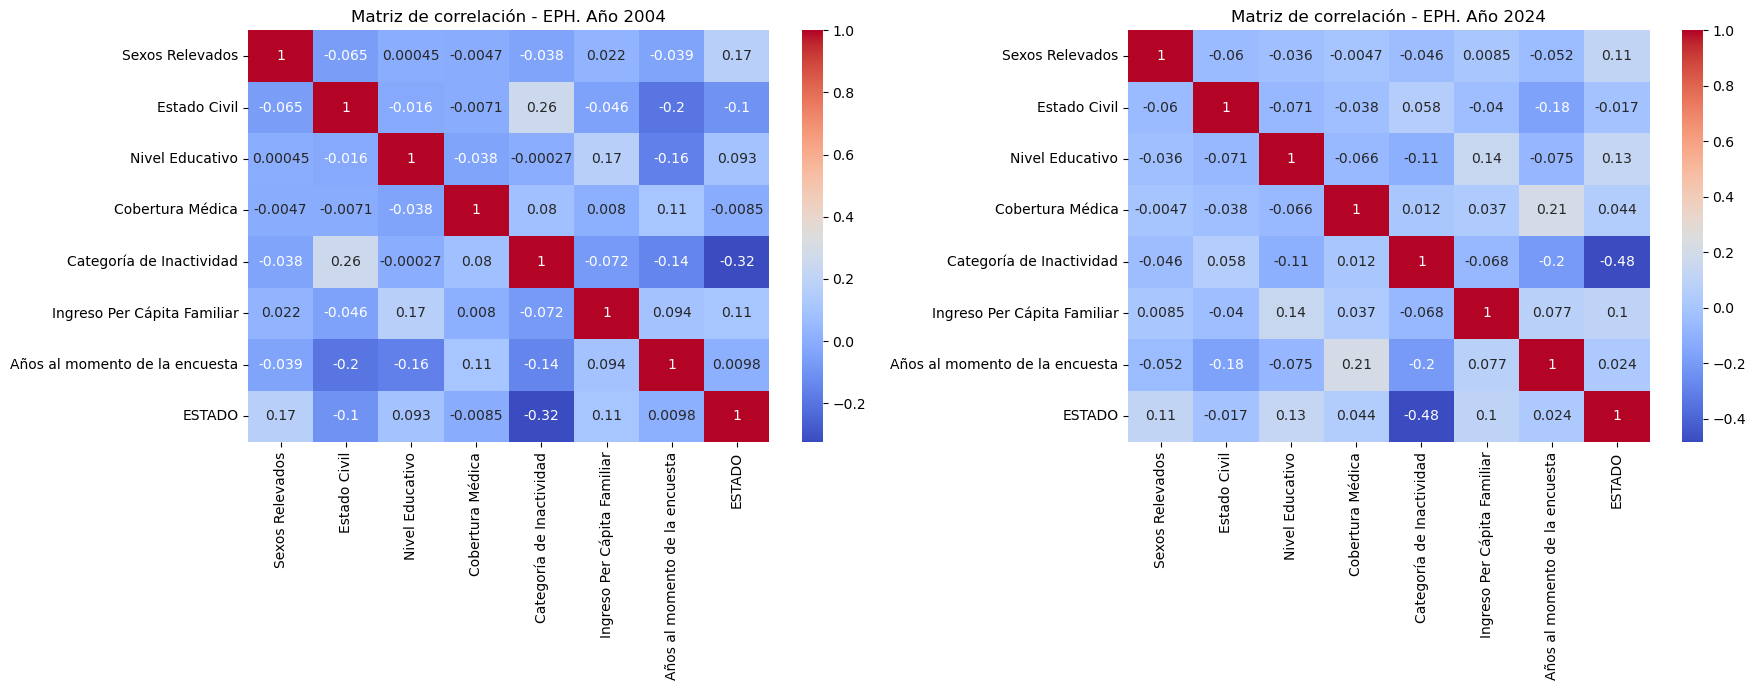

In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

juntas_df_04 = juntas_df[juntas_df['ANO4'] == 2004]
juntas_df_24 = juntas_df[juntas_df['ANO4'] == 2024]

# Seleccionamos las variables para la matriz de correlación (previamente renombradas)

variables_matriz = [
   "Sexos Relevados", "Estado Civil", "Nivel Educativo", "Cobertura Médica", 
    "Categoría de Inactividad", "Ingreso Per Cápita Familiar", "Años al momento de la encuesta",
    "ESTADO"
]

# Filtramos las variables necesarias

juntas_df_04_filtered = juntas_df_04[variables_matriz].copy()
juntas_df_24_filtered = juntas_df_24[variables_matriz].copy()

# Realizamos la conversión de variables categóricas a numéricas, si es necesario.

for df in [juntas_df_04_filtered, juntas_df_24_filtered]:
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category').cat.codes

# Creamos la matriz de correlación y la visualizamos

corr_2004 = juntas_df_04_filtered.corr()
corr_2024 = juntas_df_24_filtered.corr()

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

sns.heatmap(corr_2004, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title("Matriz de correlación - EPH. Año 2004")

sns.heatmap(corr_2024, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title("Matriz de correlación - EPH. Año 2024")

plt.tight_layout()
plt.show()

In [48]:
## Parte III, Ej 5
# Filtramos los valores únicos en la variable "Estado", que representan la condición de Ocupado, Desocupado e Inactivo
df_4 = juntas_df[juntas_df["ESTADO"].isin(["Ocupado", "Desocupado", "Inactivo"])]

# Creamos una nueva columna en el df de "juntas_df", para no modificar los valores originales de la columna "ESTADO".
juntas_df["ESTADO_DESC"] = juntas_df["ESTADO"]

# Realizamos el conteo del estado laboral
cont_estados = df_4["ESTADO_DESC"].value_counts().reset_index()
cont_estados.columns = ["Estado", "Cantidad"]

# Calculamos la media del IPCF
media_ipcf = df_4.groupby("ESTADO_DESC")["Ingreso Per Cápita Familiar"].mean().round(1).reset_index()
media_ipcf.columns = ["Estado", "Media IPCF"]

# Combinamos ambos datos en una tabla, que nos muestra el estado laboral, la cantidad de personas y la media de IPCF correspondiente a su estado.
tabla_completa = pd.merge(cont_estados, media_ipcf, on="Estado")
tabla_completa

,Estado,Cantidad,Media IPCF
0,Ocupado,6303,106443.4
1,Inactivo,5462,63863.1
2,Desocupado,839,31656.0
